# Prova 1

### Exercício 7

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import beta
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
pio.templates.default = "plotly_dark"

### a)

Amostra de tamanho 1000:

In [3]:
sample = np.linspace(0, 1.0, 1000)

Distribuição com α = β = 1, α = β = 2, α = β = 5, α = β = 10.

In [4]:
dist_1 = beta.pdf(sample, 1, 1)
dist_2 = beta.pdf(sample, 2, 2)
dist_5 = beta.pdf(sample, 5, 5)
dist_10 = beta.pdf(sample, 10, 10)

Moda

In [5]:
mode_10 = sample[stats.beta.pdf(sample, 10, 10).argmax()]

In [6]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α = β')

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_1,
               name='α = β = 1'
               ))

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_2,
               name='α = β = 2'
               ))

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_5,
               name='α = β = 5'
               ))

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_10,
               name='α = β = 10'
               ))

fig_line.add_trace(
    go.Scatter(x=[mode_10, mode_10], 
               y=[0, beta.pdf(mode_10, 10, 10)],
               mode = 'lines',
               line = dict(shape = 'linear', color = 'LightSkyBlue', dash = 'dot'),
               name='Moda'
               ))

fig_line.show()

Quando α = β, a distribuição é unimodal e simétrica em torno de 0,5.

Quando α = β = 1 é equivalente à distribuição Uniforme (0,1).

A medida que α e β aumentam a distribuição torna-se mais pontiaguda.

### b)

Quando α > 1 e β > 1, a moda é o valor mais provável da distribuição, ou seja, o pico da f.d.p.

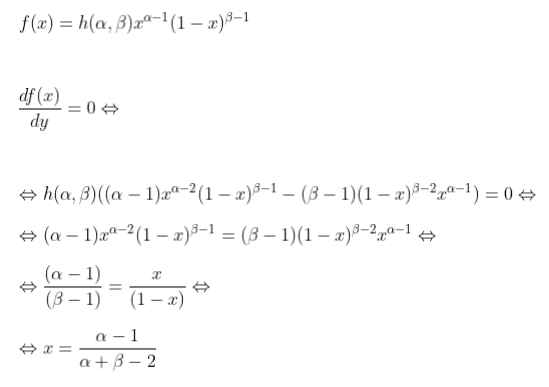

In [7]:
α = 5
β = 100

In [8]:
dist = beta.pdf(sample, α, β)

In [9]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α = 5, β = 100')

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist,
               mode = 'lines',
               line = dict(shape = 'linear', color = 'floralwhite', dash = 'solid'),
               name='α = 5, β = 100'
               ))

fig_line.show()

A distribuição é assimétrica à direita quando β é muito maior que α.

In [10]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α = 5 e β se aproximando de α')

α = 5
for i in range(20):
    β = 100 - i*5
    dist = beta.pdf(sample, α, β)
    mode = sample[stats.beta.pdf(sample, α, β).argmax()]

    fig_line.add_trace(
        go.Scatter(x=sample, 
                   y=dist,
                   mode = 'lines',
                   line = dict(shape = 'linear', color = 'floralwhite', dash = 'solid'),
                   name='α = 5, β = {}'.format(β)
                   ))
    
    fig_line.add_trace(
    go.Scatter(x=[mode, mode], 
               y=[0, beta.pdf(mode, α, β)],
               mode = 'lines',
               line = dict(shape = 'linear', color = 'lime', dash = 'dot'),
               name='Moda para α = 5, β = {}'.format(β)
               ))

fig_line.show()

Mas a distribuição fica menos assimétrica e a moda se aproxima de 0,5 quando α e β se aproximam um do outro.

### c)

In [16]:
dist_09 = beta.pdf(sample, 0.9, 0.9)
dist_05 = beta.pdf(sample, 0.5, 0.5)
dist_01 = beta.pdf(sample, 0.01, 0.01)
dist_dif = beta.pdf(sample, 0.01, 0.5)

In [17]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α = β < 1')

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_09,
               name='α = β = 0,9'
               ))

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_05,
               name='Distribuição arco-seno (α = β = 0,5)'
               ))


fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_01,
               name='α = β = 0,01'
               ))

fig_line.show()

A distribuição empurra a massa do centro para as caudas a medida que α e β diminuem.

In [18]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α ≠ β < 1')

fig_line.add_trace(
    go.Scatter(x=sample, 
               y=dist_dif,
               mode = 'lines',
               line = dict(shape = 'linear', color = 'floralwhite', dash = 'solid')
               ))


fig_line.show()

### d)

In [19]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α = 0,5 e β se aproximando de α')

α = 0.5
for i in range(10):
    β = 1 - i*0.05
    dist = beta.pdf(sample, α, β)
    mode = sample[stats.beta.pdf(sample, α, β).argmin()]

    fig_line.add_trace(
        go.Scatter(x=sample, 
                   y=dist,
                   mode = 'lines',
                   line = dict(shape = 'linear', color = 'floralwhite', dash = 'solid'),
                   name='α = 5, β = {}'.format(β)
                   ))
    
    fig_line.add_trace(
    go.Scatter(x=[mode, mode], 
               y=[0, 15],
               mode = 'lines',
               line = dict(shape = 'linear', color = 'lime', dash = 'dot'),
               name='Antimoda para α = 0.5, β = {}'.format(β)
               ))

fig_line.show()

Trocando α e β:

In [20]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com β = 0,5 e α se aproximando de β')

β = 0.5
for i in range(10):
    α = 1 - i*0.05
    dist = beta.pdf(sample, α, β)
    mode = sample[stats.beta.pdf(sample, α, β).argmin()]

    fig_line.add_trace(
        go.Scatter(x=sample, 
                   y=dist,
                   mode = 'lines',
                   line = dict(shape = 'linear', color = 'floralwhite', dash = 'solid'),
                   name='α = 5, β = {}'.format(β)
                   ))
    
    fig_line.add_trace(
    go.Scatter(x=[mode, mode], 
               y=[0, 15],
               mode = 'lines',
               line = dict(shape = 'linear', color = 'lime', dash = 'dot'),
               name='Antimoda para α = 0.5, β = {}'.format(β)
               ))

fig_line.show()

### e)

α > 1 e β <= 1

In [21]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α = 5 e β < 1 e diminuindo')

α = 2
for i in range(5):
    β = 1 - i*0.1
    dist = beta.pdf(sample, α, β)
    mode = sample[stats.beta.pdf(sample, α, β).argmin()]

    fig_line.add_trace(
        go.Scatter(x=sample, 
                   y=dist,
                   name='α = 5, β = {}'.format(β)
                   ))

fig_line.show()

β > 1 e  α <= 1

In [22]:
fig_line = go.Figure(layout_title_text='Distribuição Beta com α = 5 e β < 1 e diminuindo')

β = 2
for i in range(5):
    α = 1 - i*0.1
    dist = beta.pdf(sample, α, β)
    mode = sample[stats.beta.pdf(sample, α, β).argmin()]

    fig_line.add_trace(
        go.Scatter(x=sample, 
                   y=dist,
                   name='α = 5, β = {}'.format(β)
                   ))

fig_line.show()